In [1]:
# import necessary library
import psycopg2
#import library pandas
import pandas as pd
#import library sqlio
import pandas.io.sql as sqlio

#create database connection variable 
conn = psycopg2.connect(user="postgres", password="root1234", host="localhost", database="DVDRental")

PostgreSQL CTE
* CTE stands for Common table expressions
* CTE is a temporary result set which you can reference within another SQL statement including SELECT, INSERT, UPDATE or DELETE.
* CTE exist during the execution of the query.

### Syntex to create a CTE
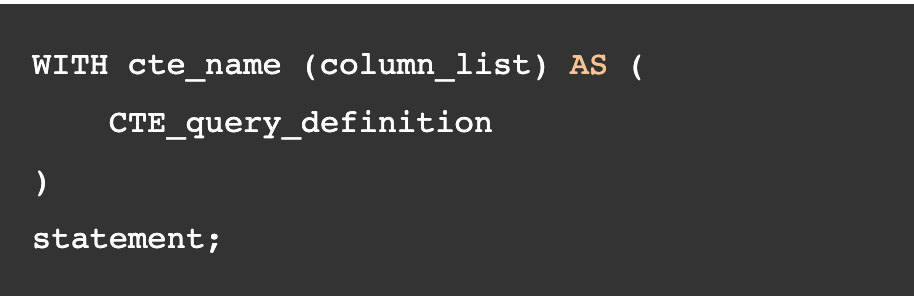

cte_name - name of the CTE
* inside the WITH clause, specify a query that returns a result set.
* If yo do not explicitly specify the column list after the CTE name, the select list of the CTE_query_defination will become the column list of the CTE.
**statement**: use the CTE like a table or view in the statement which can be a SELECT, INSERT, UPDATE or DELETE.

CTEs are used to simplify complex joins and subqueries.

#### Commands used to Create Tables and insert data for this notebook.

CREATE TABLE doctor(
    Doc_ID SERIAL PRIMARY KEY, 
    Doc_Name VARCHAR (255) NOT NULL);

CREATE TABLE patient(
    Pat_ID SERIAL PRIMARY KEY, 
    Pat_Name VARCHAR (255) NOT NULL, 
    Pat_Temp INT NOT NULL, 
    Doc_ID INT NOT NULL);

INSERT INTO doctor Values
        (1,'Sarah'),
        (2,'Affan'),
        (3, 'Irtiza'),
        (4, 'Hina'),
        (5,'Naila');

INSERT INTO patient VALUES
        (1, 'Saba', 99, 1),
        (2, 'Sidra', 100, 1),
        (3, 'Hamza', 100, 2), 
        (4, 'Aslam', 98, 2), 
        (5, 'Fizza', 101, 3), 
        (6, 'Iqra', 102, 3), 
        (7, 'Sadia', 100, 4), 
        (8, 'Sobia', 99, 4), 
        (9, 'Salman', 100, 5),
        (10, 'Jawad', 103, 5);


In [2]:
query = """SELECT * from doctor;"""
sqlio.read_sql_query(query,conn)

,doc_id,doc_name
0,1,Sarah
1,3,Irtiza
2,4,Hina
3,5,Naila
4,2,Yuvraj
5,6,Yuvraj


In [3]:
query = """SELECT * from patient;"""
sqlio.read_sql_query(query,conn)

,pat_id,pat_name,pat_temp,doc_id
0,2,Sidra,100,1
1,3,Hamza,100,2
2,4,Aslam,98,2
3,5,Fizza,101,3
4,6,Iqra,102,3
5,7,Sadia,100,4
6,8,Sobia,99,4
7,9,Salman,100,5
8,10,Jawad,103,5
9,1,Jolly LLB,99,1


#### Use CTE to display all the Records of a PostgreSQL Table

In [4]:
query = '''WITH CTE_Patient AS (
           
           SELECT Pat_ID, Pat_Name, Pat_Temp, Doc_ID FROM patient) 
           
           SELECT * FROM CTE_Patient;'''
sqlio.read_sql_query(query,conn)

,pat_id,pat_name,pat_temp,doc_id
0,2,Sidra,100,1
1,3,Hamza,100,2
2,4,Aslam,98,2
3,5,Fizza,101,3
4,6,Iqra,102,3
5,7,Sadia,100,4
6,8,Sobia,99,4
7,9,Salman,100,5
8,10,Jawad,103,5
9,1,Jolly LLB,99,1


#### Use CTE with the “WHERE” Clause in PostgreSQL:

**Check the temprature of all the patients and then display the names and IDs of only those patients who are having a fever.**

In [6]:
query = '''WITH CTE_Patient AS (
            SELECT Pat_ID, Pat_Name, 
                     (CASE WHEN Pat_Temp <= 100 THEN 'NORMAL' 
                      WHEN Pat_Temp > 100 THEN 'FEVER' 
                      END) 
                     Temperature FROM patient) 
          SELECT Pat_ID, Pat_Name, Temperature FROM CTE_Patient 
          WHERE Temperature = 'NORMAL' ORDER BY Pat_Name;'''
sqlio.read_sql_query(query,conn)

,pat_id,pat_name,temperature
0,4,Aslam,NORMAL
1,3,Hamza,NORMAL
2,1,Jolly LLB,NORMAL
3,7,Sadia,NORMAL
4,9,Salman,NORMAL
5,2,Sidra,NORMAL
6,8,Sobia,NORMAL


One logic could be
1. create a table with the list of districts and the corresponding average number of students per school.
2. Join this table with the list of schools and display the required information
3. Drop the table with the average number of students per school for each district.

Another Example of postgreSQL CTE


In [7]:
query = '''SELECT * FROM orders_store;'''
sqlio.read_sql_query(query,conn)

,id,date,customer_id,store,employee_id,amount
0,101,2021-07-01,234,East,11,198.0
1,102,2021-07-01,675,West,13,799.0
2,103,2021-07-01,456,West,14,698.0
3,104,2021-07-01,980,Center,15,99.0
4,105,2021-07-01,594,Center,16,1045.0
5,106,2021-07-01,435,East,11,599.0
6,107,2021-07-01,246,West,14,678.0
7,108,2021-07-01,256,East,12,458.0
8,109,2021-07-01,785,East,12,99.0
9,110,2021-07-01,443,Center,16,325.0


Example 1:
Compare the total amount of each order with the average order amount at the corresponding store.


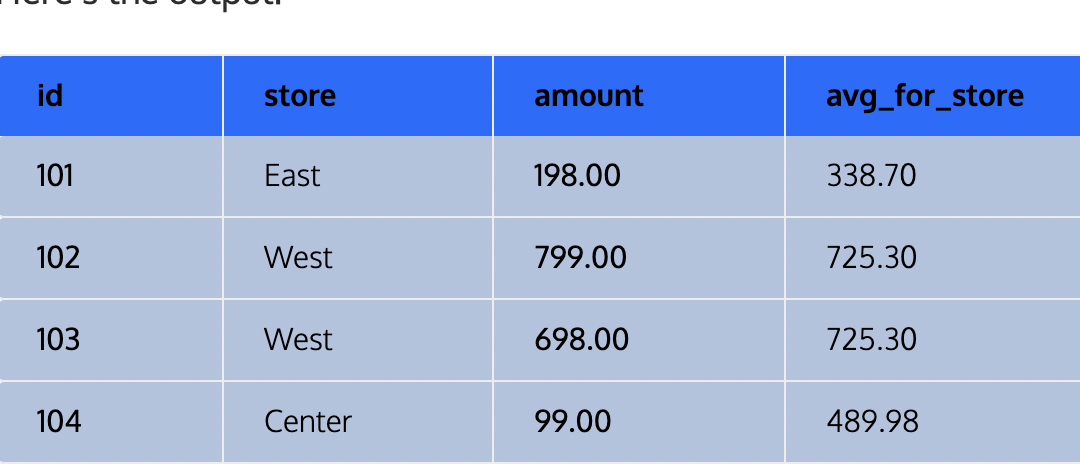

1. Create a table consisting of avg amount at corressponding store.
2. Join with the orders_store table on store column.
3. Drop newly created table.

Better way is to use a CTE:

In [16]:
query = """With avg_per_store AS (
            SELECT store, AVG(AMOUNT) AS average_order
            FROM orders_store
            GROUP BY store)
SELECT o.id, o.store,o.amount,aps.average_order from orders_store o
INNER JOIN avg_per_store aps
ON o.store = aps.store;"""
sqlio.read_sql_query(query,conn)

,id,store,amount,average_order
0,101,East,198.0,338.500000
1,102,West,799.0,725.000000
2,103,West,698.0,725.000000
3,104,Center,99.0,489.666667
4,105,Center,1045.0,489.666667
5,106,East,599.0,338.500000
6,107,West,678.0,725.000000
7,108,East,458.0,338.500000
8,109,East,99.0,338.500000
9,110,Center,325.0,489.666667


Write a query to see how the average order amount for each store compares to the minimum and the maximum of the average order amount all stores.
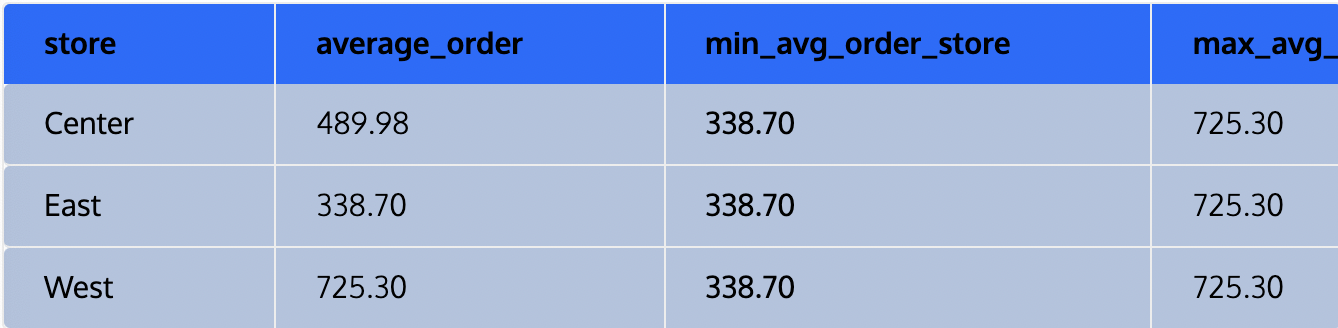

For the above query, We have to create following CTE:
1. Average order amount for each store
2. Calculate the minimum of the average order amount among all stores.
3. Calculate the maximum of the average order amount among all stores.

In [17]:
query = """With avg_per_store AS (
                SELECT store, AVG(AMOUNT) AS average_order
                FROM orders_store
                GROUP BY store),
            min_order_store AS (
                SELECT min(average_order) AS min_avg_order 
                FROM avg_per_store),
            max_order_store AS (
                SELECT MAX (average_order) AS max_avg_order
                FROM avg_per_store)
SELECT aps.store, aps.average_order, mn.min_avg_order, mx.max_avg_order
FROM avg_per_store aps
CROSS JOIN min_order_store mn
CROSS JOIN max_order_store mx;"""
sqlio.read_sql_query(query,conn)

,store,average_order,min_avg_order,max_avg_order
0,Center,489.666667,338.5,725.0
1,East,338.500000,338.5,725.0
2,West,725.000000,338.5,725.0


### Recursive Query using CTE

* A recursive query is a query that refers to a recursive CTE. 
* This process is iteration, not recursion.

### Syntex of recursive CTE

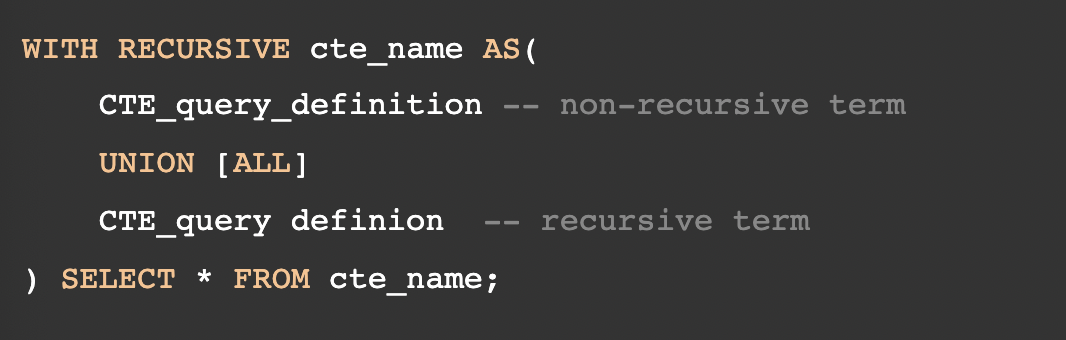

A recursive CTE has three elements: <br>
**Non-recursive term:** the non-recursive term is a CTE query defination that forms the base result set of the CTE structure. <br>
**Recursive Term:** The recursive term is one or more CTE query definitions joined with non-recursive term using the UNION or UNION ALL operator. The recursive term references the CTE name itself. <br>
**Termination check:** the recursion stops when no rows are returned from the previous iteration.

How does a Postgres resursive query work:
1. Evaluate non-recursive statements and create a temporary table
2. Evaluate recursive terms and add them to the temporary table
3. Repeat step 2 till the working table is empty.

To print the first 12 natural numbers.

In [20]:
query = '''WITH RECURSIVE tens AS (
            SELECT 1 as n
                UNION ALL
            SELECT n+1 FROM tens
        )
    SELECT n FROM tens limit 15;'''
sqlio.read_sql_query(query,conn)

,n
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


### Recursive query to find factorial of a natural number

In [21]:
query = '''WITH RECURSIVE fact (n, factorial)
            AS (
            SELECT 1 as n, 5 as factorial
            union all
            SELECT n+1, factorial*n FROM fact where n < 5
          )
            SELECT * FROM fact;;'''
sqlio.read_sql_query(query,conn)

,n,factorial
0,1,5
1,2,5
2,3,10
3,4,30
4,5,120
